In [28]:
import numpy as np
import pandas as pd
import itertools
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix

## Load and describe speedlimit data

In [19]:
X_raw = pd.read_csv('dr_speedlimits.csv')
X_raw = X_raw.fillna(0)
X_raw = X_raw[X_raw.NOPEUSRAJOITUSARVO != 0]

In [20]:
display(X_raw.head())
columns = X_raw.columns.values
speedlimits = X_raw.NOPEUSRAJOITUSARVO.unique()
speedlimit_counts = X_raw.NOPEUSRAJOITUSARVO.value_counts()

,fid,LINK_ID,LINK_MMLID,SEGM_ID,KUNTAKOODI,HALLINN_LK,TOIMINN_LK,LINKKITYYP,TIENUMERO,TIEOSANRO,...,KOR_TARK,ALKU_PAALU,LOPP_PAALU,GEOM_FLIP,LINK_TILA,GEOM_LAHDE,MTK_TIE_LK,NOPEUSRAJOITUSARVO,layer,path
1,2,76939,5.841501e+07,18_1,18,3,6,3,0.0,0.0,...,201.0,0.0,81.333,1.0,0.0,1,12141,50.0,DR_LINKKI_K_3,C:/Users/koivistojp/Desktop/DR_NOPEUSRAJOTUKSE...
6,7,4388850,6.884633e+08,638_6,638,2,5,3,0.0,0.0,...,201.0,0.0,300.415,0.0,0.0,1,12131,40.0,DR_LINKKI_K_3,C:/Users/koivistojp/Desktop/DR_NOPEUSRAJOTUKSE...
13,14,4388851,5.581829e+07,638_13,638,2,5,3,0.0,0.0,...,201.0,0.0,299.413,0.0,0.0,1,12131,40.0,DR_LINKKI_K_3,C:/Users/koivistojp/Desktop/DR_NOPEUSRAJOTUKSE...
19,20,4388852,5.566444e+07,638_19,638,2,5,3,0.0,0.0,...,201.0,0.0,92.338,1.0,0.0,1,12131,40.0,DR_LINKKI_K_3,C:/Users/koivistojp/Desktop/DR_NOPEUSRAJOTUKSE...
20,21,4391876,1.053337e+09,638_20,638,1,4,3,11863.0,1.0,...,201.0,0.0,108.223,1.0,0.0,1,12122,80.0,DR_LINKKI_K_3,C:/Users/koivistojp/Desktop/DR_NOPEUSRAJOTUKSE...


In [21]:
data_x = X_raw[['AJORATA', 'AJOSUUNTA', 'HALLINN_LK', "TOIMINN_LK", "LINKKITYYP", "TIENUMERO", "TIEOSANRO", "MTK_TIE_LK"]]
data_y = X_raw[['NOPEUSRAJOITUSARVO']].astype(int)
display(data_x.head())

,AJORATA,AJOSUUNTA,HALLINN_LK,TOIMINN_LK,LINKKITYYP,TIENUMERO,TIEOSANRO,MTK_TIE_LK
1,0.0,2,3,6,3,0.0,0.0,12141
6,0.0,2,2,5,3,0.0,0.0,12131
13,0.0,2,2,5,3,0.0,0.0,12131
19,0.0,2,2,5,3,0.0,0.0,12131
20,0.0,2,1,4,3,11863.0,1.0,12122


## Histogram

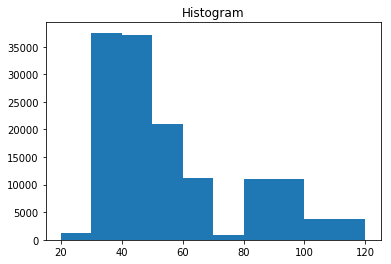

In [22]:
a = np.array(data_y)
plt.hist(a,bins = sorted(speedlimits))
plt.title("Histogram") 
plt.show()

### 1. Scale
### 2. Split into train and test sets
### 3. Run logistic regression
### 4. Compare prediction to correct labels

In [23]:
X = StandardScaler().fit_transform(data_x)

X_train, X_test, y_train, y_test = train_test_split(X, data_y, test_size=0.85)

model = LogisticRegression(random_state=2, solver='lbfgs', multi_class='multinomial', max_iter=5000).fit(X_train, y_train)
y_hat = model.predict(X_test)

accuracy = accuracy_score(y_test, y_hat)
print("Accuracy: {:.6f}".format(accuracy))

c:\users\koivistojp\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\koivistojp\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
c:\users\koivistojp\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.491756


<Figure size 432x288 with 0 Axes>

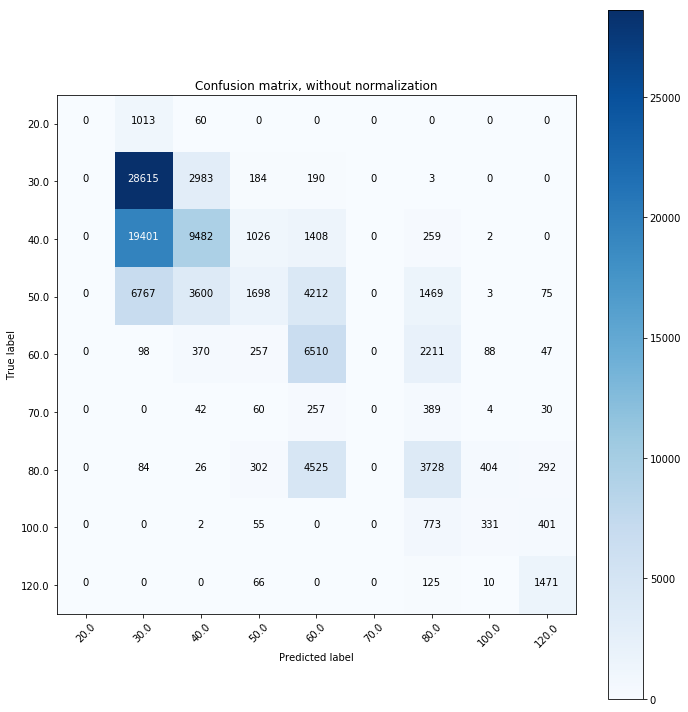

In [45]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

cnf_matrix = confusion_matrix(y_test, y_hat)

plt.figure()
plt.figure(figsize=(10,10))
plot_confusion_matrix(cnf_matrix, classes=sorted(speedlimits),
                      title='Confusion matrix, without normalization')